In [25]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('data/ner_dataset.csv', encoding = "ISO-8859-1")
df = df[:50000]
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [27]:
df.isnull().sum()

Sentence #    47730
Word              0
POS               0
Tag               0
dtype: int64

In [28]:
# fill NaN by preceding values
df = df.fillna(method='ffill')
df['Sentence #'].nunique(), df.Word.nunique(), df.Tag.nunique()

(2270, 7464, 17)

In [29]:
df

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


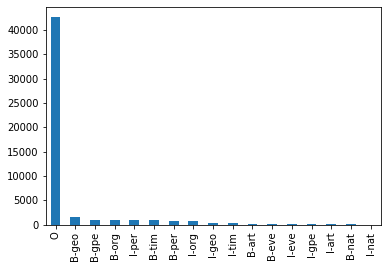

In [30]:
df["Tag"].value_counts().plot.bar()
plt.show()

In [31]:
df.groupby('Tag').size().reset_index(name="count")

,Tag,count
0,B-art,48
1,B-eve,39
2,B-geo,1490
3,B-gpe,968
4,B-nat,18
5,B-org,959
6,B-per,789
7,B-tim,880
8,I-art,27
9,I-eve,33


In [32]:
X = df.drop('Tag', axis=1)
v = DictVectorizer(sparse=False)
X = v.fit_transform(X.to_dict('records'))
y = df.Tag.values
classes = np.unique(y)
classes = classes.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)
X_train.shape, y_train.shape

((33500, 9774), (33500,))

In [33]:
per = Perceptron(verbose=10, n_jobs=-1, max_iter=5)
per.partial_fit(X_train, y_train, classes)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 40.36, NNZs: 932, Bias: -3.000000, T: 33500, Avg. loss: 0.020746
Total training time: 1.31 seconds.
-- Epoch 1
Norm: 50.47, NNZs: 1434, Bias: -5.000000, T: 33500, Avg. loss: 0.042269
Total training time: 1.34 seconds.
-- Epoch 1
Norm: 7.21, NNZs: 49, Bias: -2.000000, T: 33500, Avg. loss: 0.000955
Total training time: 1.35 seconds.
-- Epoch 1
Norm: 42.87, NNZs: 1146, Bias: -4.000000, T: 33500, Avg. loss: 0.036328
Total training time: 1.35 seconds.
-- Epoch 1
Norm: 10.34, NNZs: 101, Bias: -3.000000, T: 33500, Avg. loss: 0.002030
Total training time: 1.35 seconds.
-- Epoch 1Norm: 35.41, NNZs: 871, Bias: -4.000000, T: 33500, Avg. loss: 0.024149

Total training time: 1.35 seconds.
-- Epoch 1
Norm: 35.31, NNZs: 695, Bias: -3.000000, T: 33500, Avg. loss: 0.017612
Total training time: 1.41 seconds.
-- Epoch 1
Norm: 10.20, NNZs: 77, Bias: -4.000000, T: 33500, Avg. loss: 0.001433
Total training time: 1.

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 out of  17 | elapsed:    1.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   6 out of  17 | elapsed:    1.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   8 out of  17 | elapsed:    1.5s remaining:    1.7s


Norm: 9.70, NNZs: 80, Bias: -4.000000, T: 33500, Avg. loss: 0.001224
Total training time: 1.30 seconds.
-- Epoch 1
Norm: 9.64, NNZs: 76, Bias: -3.000000, T: 33500, Avg. loss: 0.001164Norm: 6.16, NNZs: 27, Bias: -2.000000, T: 33500, Avg. loss: 0.000209
Total training time: 1.30 seconds.
Total training time: 1.30 seconds.

Norm: 24.43, NNZs: 417, Bias: -3.000000, T: 33500, Avg. loss: 0.010478
Total training time: 1.35 seconds.
Norm: 8.66, NNZs: 63, Bias: -3.000000, T: 33500, Avg. loss: 0.001313
Total training time: 1.38 seconds.
Norm: 21.84, NNZs: 341, Bias: -3.000000, T: 33500, Avg. loss: 0.009881
Total training time: 1.26 seconds.
Norm: 38.47, NNZs: 860, Bias: -6.000000, T: 33500, Avg. loss: 0.023343
Total training time: 1.41 seconds.
Norm: 44.52, NNZs: 1248, Bias: -6.000000, T: 33500, Avg. loss: 0.028746
Total training time: 1.40 seconds.


[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    2.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    2.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    2.8s remaining:    0.6s


Norm: 51.33, NNZs: 1478, Bias: 3.000000, T: 33500, Avg. loss: 0.046090
Total training time: 0.52 seconds.


[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    3.1s finished


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=-1,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=10, warm_start=False)

In [34]:
new_classes = classes.copy()
new_classes.pop()
new_classes

['B-art',
 'B-eve',
 'B-geo',
 'B-gpe',
 'B-nat',
 'B-org',
 'B-per',
 'B-tim',
 'I-art',
 'I-eve',
 'I-geo',
 'I-gpe',
 'I-nat',
 'I-org',
 'I-per',
 'I-tim']

In [35]:
print(classification_report(y_pred=per.predict(X_test), y_true=y_test, labels=new_classes))

              precision    recall  f1-score   support

       B-art       0.75      0.17      0.27        18
       B-eve       0.00      0.00      0.00        14
       B-geo       0.76      0.39      0.52       476
       B-gpe       0.26      0.82      0.39       320
       B-nat       0.00      0.00      0.00         3
       B-org       0.56      0.45      0.50       301
       B-per       0.68      0.47      0.55       258
       B-tim       0.86      0.75      0.81       272
       I-art       0.00      0.00      0.00         5
       I-eve       0.67      0.36      0.47        11
       I-geo       0.36      0.60      0.45       115
       I-gpe       0.00      0.00      0.00        11
       I-nat       0.50      0.33      0.40         3
       I-org       0.81      0.23      0.36       200
       I-per       0.86      0.08      0.15       306
       I-tim       0.44      0.09      0.15        90

   micro avg       0.48      0.44      0.46      2403
   macro avg       0.47   

/home/zaghlol/Projects/NER/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
sgd = SGDClassifier()
sgd.partial_fit(X_train, y_train, classes)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
print(classification_report(y_pred=sgd.predict(X_test), y_true=y_test, labels=new_classes))

              precision    recall  f1-score   support

       B-art       0.50      0.11      0.18        18
       B-eve       0.00      0.00      0.00        14
       B-geo       0.47      0.89      0.61       476
       B-gpe       0.95      0.53      0.68       320
       B-nat       0.00      0.00      0.00         3
       B-org       0.79      0.26      0.39       301
       B-per       0.76      0.38      0.51       258
       B-tim       0.92      0.71      0.80       272
       I-art       0.50      0.20      0.29         5
       I-eve       0.36      0.36      0.36        11
       I-geo       0.85      0.30      0.44       115
       I-gpe       0.00      0.00      0.00        11
       I-nat       0.00      0.00      0.00         3
       I-org       0.65      0.35      0.46       200
       I-per       0.47      0.73      0.57       306
       I-tim       0.40      0.02      0.04        90

   micro avg       0.60      0.54      0.57      2403
   macro avg       0.48   

/home/zaghlol/Projects/NER/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
nb = MultinomialNB(alpha=0.01)
nb.partial_fit(X_train, y_train, classes)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [39]:
print(classification_report(y_pred=nb.predict(X_test), y_true=y_test, labels = new_classes))

              precision    recall  f1-score   support

       B-art       0.09      0.28      0.13        18
       B-eve       0.29      0.29      0.29        14
       B-geo       0.66      0.58      0.62       476
       B-gpe       0.65      0.73      0.68       320
       B-nat       0.18      0.67      0.29         3
       B-org       0.48      0.48      0.48       301
       B-per       0.38      0.48      0.42       258
       B-tim       0.60      0.72      0.65       272
       I-art       0.08      0.20      0.12         5
       I-eve       0.47      0.64      0.54        11
       I-geo       0.43      0.49      0.46       115
       I-gpe       0.00      0.00      0.00        11
       I-nat       0.00      0.00      0.00         3
       I-org       0.47      0.48      0.48       200
       I-per       0.52      0.45      0.49       306
       I-tim       0.16      0.26      0.20        90

   micro avg       0.50      0.54      0.52      2403
   macro avg       0.34   

In [40]:
pa =PassiveAggressiveClassifier()
pa.partial_fit(X_train, y_train, classes)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [41]:
print(classification_report(y_pred=pa.predict(X_test), y_true=y_test, labels=new_classes))

              precision    recall  f1-score   support

       B-art       0.50      0.17      0.25        18
       B-eve       0.18      0.21      0.19        14
       B-geo       0.70      0.66      0.68       476
       B-gpe       0.85      0.58      0.69       320
       B-nat       0.00      0.00      0.00         3
       B-org       0.64      0.40      0.49       301
       B-per       0.43      0.55      0.48       258
       B-tim       0.91      0.69      0.78       272
       I-art       0.00      0.00      0.00         5
       I-eve       0.50      0.27      0.35        11
       I-geo       0.50      0.50      0.50       115
       I-gpe       1.00      0.09      0.17        11
       I-nat       0.27      1.00      0.43         3
       I-org       0.70      0.32      0.44       200
       I-per       0.44      0.67      0.53       306
       I-tim       0.41      0.29      0.34        90

   micro avg       0.60      0.55      0.57      2403
   macro avg       0.50   

## CRF

In [51]:
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from collections import Counter

In [43]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(), 
                                                           s['POS'].values.tolist(), 
                                                           s['Tag'].values.tolist())]
        self.grouped = self.data.groupby('Sentence #').apply(agg_func)
        self.sentences = [s for s in self.grouped]
        
    def get_next(self):
        try: 
            s = self.grouped['Sentence: {}'.format(self.n_sent)]
            self.n_sent += 1
            return s 
        except:
            return None

In [44]:
getter = SentenceGetter(df)
sentences = getter.sentences

In [47]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

In [48]:
X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [52]:
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

CRF(algorithm='lbfgs', all_possible_states=None, all_possible_transitions=True,
    averaging=None, c=None, c1=0.1, c2=0.1, calibration_candidates=None,
    calibration_eta=None, calibration_max_trials=None, calibration_rate=None,
    calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
    gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
    max_linesearch=None, min_freq=None, model_filename=None, num_memories=None,
    pa_type=None, period=None, trainer_cls=None, variance=None, verbose=False)

In [53]:
y_pred = crf.predict(X_test)
print(metrics.flat_classification_report(y_test, y_pred, labels = new_classes))

              precision    recall  f1-score   support

       B-art       0.50      0.05      0.10        19
       B-eve       0.71      0.29      0.42        17
       B-geo       0.67      0.86      0.75       475
       B-gpe       0.83      0.73      0.78       334
       B-nat       0.00      0.00      0.00         5
       B-org       0.71      0.57      0.63       354
       B-per       0.79      0.79      0.79       243
       B-tim       0.87      0.86      0.87       291
       I-art       0.00      0.00      0.00        12
       I-eve       1.00      0.25      0.40        16
       I-geo       0.65      0.65      0.65        92
       I-gpe       0.00      0.00      0.00         9
       I-nat       0.00      0.00      0.00         1
       I-org       0.77      0.76      0.76       254
       I-per       0.84      0.93      0.88       283
       I-tim       0.71      0.62      0.66        88

   micro avg       0.76      0.75      0.76      2493
   macro avg       0.56   

/home/zaghlol/Projects/NER/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

In [55]:
print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20))
print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[-20:])

Top likely transitions:
B-geo  -> I-geo   6.025124
B-per  -> I-per   5.752572
I-tim  -> I-tim   5.537304
B-org  -> I-org   5.377582
I-org  -> I-org   5.225950
B-tim  -> I-tim   5.203619
B-gpe  -> I-gpe   4.811577
I-per  -> I-per   4.570931
B-art  -> I-art   4.515261
B-eve  -> I-eve   4.346047
I-gpe  -> I-gpe   4.146536
I-geo  -> I-geo   4.096209
I-art  -> I-art   3.888031
O      -> O       3.750474
B-nat  -> I-nat   3.301682
I-eve  -> I-eve   3.097023
B-org  -> B-art   2.426228
I-nat  -> I-nat   1.998332
O      -> B-eve   1.883422
O      -> B-per   1.803690

Top unlikely transitions:
I-geo  -> B-per   -1.034029
B-org  -> I-per   -1.076155
I-tim  -> B-tim   -1.083762
B-geo  -> I-org   -1.174412
B-geo  -> I-per   -1.183731
B-gpe  -> I-org   -1.188898
I-org  -> I-per   -1.284712
B-org  -> B-org   -1.326719
B-gpe  -> I-geo   -1.380641
B-tim  -> B-tim   -1.421861
O      -> I-art   -1.550078
B-tim  -> B-gpe   -1.830413
B-geo  -> B-per   -2.019120
B-per  -> B-per   -2.047799
B-gpe  -> B-gpe  